In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Let's create synthetic datasets
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples = 1000 , n_features = 2 , n_targets = 1 , noise = 3.0)

In [5]:
X

array([[ 0.06342728, -0.81250987],
       [ 1.00362039, -0.23170818],
       [-1.24106078,  1.57011609],
       ...,
       [-0.54003572, -0.1886247 ],
       [ 2.00503373,  0.57176259],
       [-2.50810942, -1.51691131]])

In [8]:
y

array([-4.16811969e+00,  2.87028467e+01, -3.32232723e+01,  3.18755420e+00,
       -3.29135582e+01, -3.38829402e+01, -8.82529639e+00, -3.20947329e+00,
        3.87840638e+01,  1.19460807e+01,  3.27095616e+01, -4.33634192e+01,
        2.90472356e+01, -2.84572669e+00, -6.76957311e+00,  7.15805080e+00,
       -8.62114412e+00, -5.44806736e+00,  1.46536306e+01,  4.43219708e+01,
        1.39169634e+01, -5.13485372e+00,  4.63540552e+00, -2.03370623e+01,
       -2.44560539e+01,  2.52385526e+01,  7.98974599e-01, -1.19272714e+01,
       -2.03237439e+01,  8.50139213e+00, -8.03718308e+00,  2.70278878e+00,
        3.51823100e+00,  1.98740154e+01, -2.15244451e+01,  8.13548656e+00,
       -1.28217013e+01,  2.79883554e+01,  2.85990697e+01, -6.43092168e+00,
       -3.92783463e+01, -2.95381356e+01,  1.13024264e+01, -2.49591050e+01,
       -4.07471386e+01, -3.91877381e+00, -4.01774950e+00, -8.31189198e+00,
        3.67771837e+00,  1.90875169e+00,  2.59107523e+00,  1.99140849e+01,
       -1.27830671e+01, -

In [7]:
pd.DataFrame(X)[0]

0     -1.228990
1     -0.142905
2      0.026029
3      1.915926
4     -0.629680
         ...   
995    0.170305
996    1.052874
997    0.400797
998    0.172450
999    0.087973
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

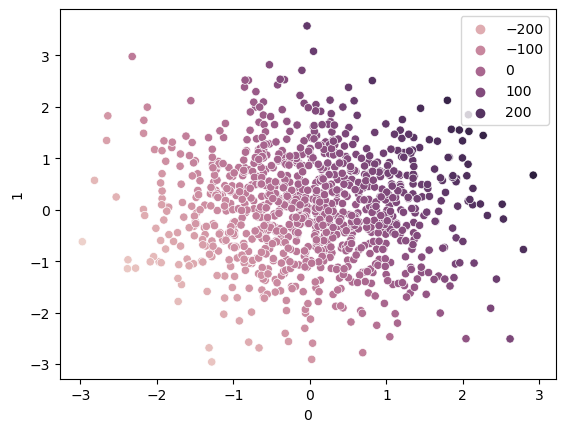

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[89.29980785, 48.57105959]])

In [15]:
y_pred = svr.predict(X_test)

In [16]:
y_pred

array([-1.68355639e+02,  9.22103049e+01,  8.09286575e+01, -1.65091175e+01,
        4.98067503e+01,  1.01196672e+02,  1.23921628e+02,  9.06274316e+01,
       -1.26133918e+02, -1.00371385e+02, -2.50785910e+01, -2.12261028e+01,
       -1.01953527e+01,  7.63003566e+01, -2.44957520e+01,  1.93046161e+02,
        8.64838632e+01, -1.73556594e+01, -4.00193615e+01,  4.08690985e+01,
       -1.96331718e+02,  1.84033290e+02,  8.41260491e+01, -3.25395222e+01,
       -1.29338727e+01,  4.21046758e+00,  2.26978283e+02, -1.00901929e+02,
       -5.82514022e+01,  2.72292265e+01,  1.04062318e+01, -5.47562823e+01,
       -3.03393162e+01,  9.30332826e+01,  2.78894774e+01, -4.68524834e+01,
       -2.58215838e+02, -1.34606784e+02,  1.07909616e+02, -3.55191129e+01,
        3.07522877e+01, -7.36612900e+01, -5.95825325e+01, -5.92853924e+01,
       -2.40336063e+02,  5.02601597e+01, -7.57942426e+01, -2.08318607e+00,
        1.32466819e+02, -8.51623777e+01,  6.57978376e+01, -2.87999455e+01,
       -9.58962605e-01,  

In [17]:
from sklearn.metrics import r2_score

In [18]:
print(r2_score(y_test, y_pred))

0.999014896017839


## Hyperparametere Tuning With SVR

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
# defining parameter range

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [22]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.706 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.699 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.707 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.702 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.700 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.706 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.699 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.707 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.702 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.700 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [25]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9990905655901797
